In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
#read in csv files
exports_csv = "final_clean_exports.csv"
imports_csv = "final_clean_imports.csv"
exports_df = pd.read_csv(exports_csv)
imports_df = pd.read_csv(imports_csv)

In [217]:
#Identify total imports
imports_df["Metric Tons"].sum()

1213648827.63351

In [218]:
#Identify total exports
exports_df["Metric Tons"].sum()

6071759414.870392

In [219]:
#Identify countries from which the U.S. imported livestock
imports_df["Country"].unique()

array(['Argentina', 'Australia', 'China (Mainland)', 'Colombia', 'France',
       'Germany, Fed. Republic', 'Greece', 'India', 'Italy', 'Japan',
       'Mexico', 'Peru', 'Poland', 'United Kingdom'], dtype=object)

In [220]:
exports_df["Country"].unique()

array(['Argentina', 'Australia', 'Bulgaria', 'China (Mainland)',
       'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India',
       'Indonesia', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland',
       'Saudi Arabia', 'Turkey', 'United Kingdom', 'Zambia'], dtype=object)

In [221]:
#Identify U.S. Exports
exports_df["Commodity"].value_counts()

Chicken    29623
Pork       24134
Beef       16196
Turkey      8338
Sheep       2682
Goat         112
Name: Commodity, dtype: int64

In [222]:
#Identify U.S. Imports
imports_df["Commodity"].value_counts()

Beef       7893
Pork       7772
Sheep      4342
Chicken    2197
Other       439
Goat          4
Name: Commodity, dtype: int64

In [223]:
#pare data to separate out by specific export
chicken_exports = exports_df.loc[(exports_df["Commodity"]=="Chicken")]
beef_exports = exports_df.loc[(exports_df["Commodity"]=="Beef")]
pork_exports = exports_df.loc[(exports_df["Commodity"]=="Pork")]


In [224]:
#pare data to separate out by specific import
chicken_imports = imports_df.loc[(imports_df["Commodity"]=="Chicken")]
beef_imports = imports_df.loc[(imports_df["Commodity"]=="Beef")]
pork_imports = imports_df.loc[(imports_df["Commodity"]=="Pork")]


In [225]:
#data munging to present data for total exports
exports_total = exports_df.groupby(["Country","Year"]).sum().reset_index()
exports_pivot = exports_total.pivot(index="Year", columns="Country", values="Metric Tons")
exports_pct = exports_pivot.pct_change()
exports_pct["Mean"] = exports_pct.mean(axis=1)
exports_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia,Mean
Year,,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN,1.567727
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899,2.429835
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000,-0.073528
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934,0.699089
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000,0.018569
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181,1.684828
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000,0.047062
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000,0.239424


In [226]:
#data munging to present data fro total imports
imports_total = imports_df.groupby(["Country","Year"]).sum().reset_index()
imports_pivot = imports_total.pivot(index="Year", columns="Country", values="Metric Tons")
imports_pct = imports_pivot.pct_change()
imports_pct["Mean"] = imports_pct.mean(axis=1)

In [227]:
#group chicken exports by country and year
summary_chicken_exports = chicken_exports.groupby(["Country","Year"]).sum().reset_index()
summary_chicken_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,91784,4352371,1.885215e+05,5941.725297
1,Argentina,2007,61310,3015057,6.601521e+04,2080.634071
2,Argentina,2008,122863,6118481,6.859173e+04,2161.839401
3,Argentina,2009,61508,3236537,2.221124e+05,7000.424633
4,Argentina,2010,493517,17690181,2.032217e+06,40191.830504


In [228]:
#data munge and convert to percent change
summary_chicken_pivot = summary_chicken_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_chicken_pct = summary_chicken_pivot.pct_change()
summary_chicken_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.649827,-0.312971,0.00000,0.261759,0.097344,-0.919214,1.392605,0.542004,2.191414,2.937510,0.482877,0.068014,0.071087,6.254043,-0.915440,0.134719,-0.270661,16.722996,NaN
2008,0.039029,0.260523,-0.59724,0.116201,0.145282,1.382076,1.219374,-0.290437,0.475911,95.075788,2.875843,0.207454,0.205566,-0.645414,0.346725,1.699415,0.064874,1.522156,0.0
2009,2.238180,0.690783,0.00000,-0.015740,0.147094,0.350538,0.241520,0.352195,-0.854008,-0.584434,-0.086972,-0.409842,0.196136,2.766544,-0.182591,-0.361666,-0.130701,-0.977149,0.0
2010,4.741342,-0.391412,0.00000,-0.831551,0.230759,2.534731,0.091946,-0.496169,1.021095,-0.970552,-0.190711,1.198438,0.177239,3.236290,-0.998474,0.107092,-0.297351,0.337889,0.0
2011,-0.634712,1.422331,0.00000,0.218515,-0.085130,5.565672,0.014900,-0.455822,5.418574,1.003258,-0.424047,0.334051,0.054597,-0.195858,2.053031,0.343854,-0.061887,0.666191,0.0
2012,-0.991167,0.492440,0.00000,0.397191,0.106013,-0.755637,0.282685,-0.405348,-0.842512,-0.491667,-0.574157,-0.537358,0.232454,0.095315,-0.973984,1.329024,0.528032,-0.214440,0.0
2013,36.864486,0.102243,0.00000,0.375106,0.095322,-0.959412,-0.290663,-0.424614,-0.849640,0.053470,1.228595,-0.261888,0.159572,0.254406,-0.472821,1.118369,-0.021243,-0.607209,0.0
2014,6.356082,0.202682,0.00000,-0.096098,0.001653,-0.248253,0.007608,-0.598184,3.875870,2.158812,-0.862643,0.165194,0.100208,0.053625,0.000000,-0.306771,0.053803,0.270689,0.0


In [253]:
ch_ex_mean = summary_chicken_pct.drop(columns=["Argentina","Bulgaria", "Indonesia"])
ch_ex_mean["Mean"] = ch_ex_mean.mean(axis=1)
ch_ex_mean

Country,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia,Mean
Year,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.312971,0.261759,0.097344,-0.919214,1.392605,0.542004,2.191414,0.482877,0.068014,0.071087,6.254043,-0.915440,0.134719,-0.270661,16.722996,NaN,1.720039
2008,0.260523,0.116201,0.145282,1.382076,1.219374,-0.290437,0.475911,2.875843,0.207454,0.205566,-0.645414,0.346725,1.699415,0.064874,1.522156,0.0,0.599097
2009,0.690783,-0.015740,0.147094,0.350538,0.241520,0.352195,-0.854008,-0.086972,-0.409842,0.196136,2.766544,-0.182591,-0.361666,-0.130701,-0.977149,0.0,0.107884
2010,-0.391412,-0.831551,0.230759,2.534731,0.091946,-0.496169,1.021095,-0.190711,1.198438,0.177239,3.236290,-0.998474,0.107092,-0.297351,0.337889,0.0,0.358113
2011,1.422331,0.218515,-0.085130,5.565672,0.014900,-0.455822,5.418574,-0.424047,0.334051,0.054597,-0.195858,2.053031,0.343854,-0.061887,0.666191,0.0,0.929311
2012,0.492440,0.397191,0.106013,-0.755637,0.282685,-0.405348,-0.842512,-0.574157,-0.537358,0.232454,0.095315,-0.973984,1.329024,0.528032,-0.214440,0.0,-0.052518
2013,0.102243,0.375106,0.095322,-0.959412,-0.290663,-0.424614,-0.849640,1.228595,-0.261888,0.159572,0.254406,-0.472821,1.118369,-0.021243,-0.607209,0.0,-0.034617
2014,0.202682,-0.096098,0.001653,-0.248253,0.007608,-0.598184,3.875870,-0.862643,0.165194,0.100208,0.053625,0.000000,-0.306771,0.053803,0.270689,0.0,0.163712


<function matplotlib.pyplot.show(*args, **kw)>

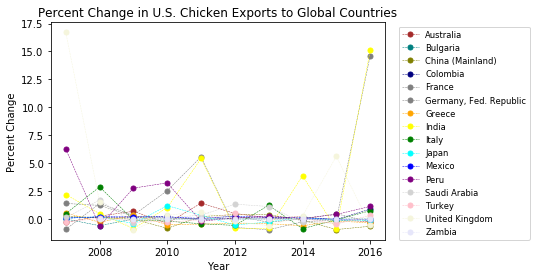

In [96]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_chicken_pct:
     if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Colombia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = summary_chicken_pct.index
        y_axis = summary_chicken_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.savefig("task2_graph_images/chicken_exports.png",bbox_inches="tight")
plt.show

In [97]:
summary_beef_exports = beef_exports.groupby(["Country","Year"]).sum().reset_index()
summary_beef_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,152971,6707107,1.798485e+05,6110.679775
1,Argentina,2007,183945,9039233,1.503214e+05,4885.323968
2,Argentina,2008,122829,5046833,4.211474e+05,13346.906723
3,Argentina,2009,61509,3611192,3.811577e+04,1201.313672
4,Argentina,2010,431775,15081091,1.104727e+06,35190.093008


In [98]:
summary_beef_pivot = summary_beef_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_beef_pct = summary_beef_pivot.pct_change()
summary_beef_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.200527,NaN,-0.999795,0.305851,5.520564,0.897428,0.026029,-0.579685,NaN,-0.980527,3.173660,2.317601,-0.112962,0.351233,NaN,-0.247203,113.389240,0.073108,NaN
2008,1.732041,96.724353,29670.116847,-0.608746,6.948937,-0.197997,1.363105,-0.972435,5.582885,250.771043,0.156933,0.474132,0.295764,1.554592,NaN,0.727957,-0.529439,-0.147684,6.463199
2009,-0.909993,1.046852,-0.915713,0.291753,-0.731848,-0.396836,-0.515912,4.974226,-0.891249,1.000373,0.024859,0.194200,-0.173394,0.193093,0.000000,-0.180528,1.033940,-0.681066,0.000000
2010,28.293010,-0.442000,0.000000,0.888338,5.812341,0.159921,1.573249,0.244404,0.000000,5.595882,2.478673,0.287871,-0.203999,0.997484,5.701995,1.030350,6.060003,0.212117,-0.696934
2011,1.091531,3.984578,0.000000,-0.531057,2.761674,-0.578246,0.740259,3.369228,-0.990721,0.436168,0.557853,0.314685,-0.025516,0.478342,-0.763428,0.296305,0.934873,0.576487,0.000000
2012,-0.999601,0.883823,0.000000,1.919436,-0.619572,-0.130096,-0.191103,-0.575034,0.000000,-0.799705,-0.175138,-0.011453,-0.282682,0.865111,0.000000,-0.690966,-0.534558,-0.421401,0.000000
2013,0.000000,0.408122,0.000000,0.201342,2.721593,-0.171621,0.185827,0.819452,0.000000,0.936645,0.106589,0.504030,0.148962,-0.193010,0.000000,-0.964338,-0.084823,0.323384,0.000000
2014,8.237179,-0.551234,-0.998118,-0.496250,0.186302,-0.063911,-0.118579,-0.314211,6.896992,0.301337,0.073211,-0.008145,0.077606,-0.046197,0.000000,0.271695,-0.560666,1.204277,0.000000


In [254]:
beef_ex_mean = summary_beef_pct.drop(columns=["Argentina","Bulgaria","Indonesia"])
beef_ex_mean["Mean"] = beef_ex_mean.mean(axis=1)
beef_ex_mean

Country,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia,Mean
Year,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,0.305851,5.520564,0.897428,0.026029,-0.579685,NaN,3.173660,2.317601,-0.112962,0.351233,NaN,-0.247203,113.389240,0.073108,NaN,10.426239
2008,96.724353,-0.608746,6.948937,-0.197997,1.363105,-0.972435,5.582885,0.156933,0.474132,0.295764,1.554592,NaN,0.727957,-0.529439,-0.147684,6.463199,7.855704
2009,1.046852,0.291753,-0.731848,-0.396836,-0.515912,4.974226,-0.891249,0.024859,0.194200,-0.173394,0.193093,0.000000,-0.180528,1.033940,-0.681066,0.000000,0.261756
2010,-0.442000,0.888338,5.812341,0.159921,1.573249,0.244404,0.000000,2.478673,0.287871,-0.203999,0.997484,5.701995,1.030350,6.060003,0.212117,-0.696934,1.506488
2011,3.984578,-0.531057,2.761674,-0.578246,0.740259,3.369228,-0.990721,0.557853,0.314685,-0.025516,0.478342,-0.763428,0.296305,0.934873,0.576487,0.000000,0.695332
2012,0.883823,1.919436,-0.619572,-0.130096,-0.191103,-0.575034,0.000000,-0.175138,-0.011453,-0.282682,0.865111,0.000000,-0.690966,-0.534558,-0.421401,0.000000,0.002273
2013,0.408122,0.201342,2.721593,-0.171621,0.185827,0.819452,0.000000,0.106589,0.504030,0.148962,-0.193010,0.000000,-0.964338,-0.084823,0.323384,0.000000,0.250344
2014,-0.551234,-0.496250,0.186302,-0.063911,-0.118579,-0.314211,6.896992,0.073211,-0.008145,0.077606,-0.046197,0.000000,0.271695,-0.560666,1.204277,0.000000,0.409431


<function matplotlib.pyplot.show(*args, **kw)>

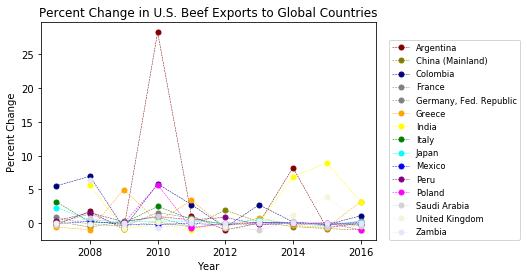

In [100]:
color = "brown"
marker = "o"
columns = []

for column in summary_beef_pct:
     if column != "Australia" and column != "Bulgaria" and column != "Indonesia" and column != "Turkey":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Colombia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
       
        
        x_axis = summary_beef_pct.index
        y_axis = summary_beef_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Beef Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.savefig("task2_graph_images/beef_exports.png",bbox_inches="tight")
plt.show

In [101]:
summary_pork_exports = pork_exports.groupby(["Country","Year"]).sum().reset_index()
summary_pork_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,214195,9859698,3.204735e+05,8961.768415
1,Argentina,2007,183971,9279834,1.293487e+06,43127.493487
2,Argentina,2008,153577,7760092,3.184446e+05,11264.174476
3,Argentina,2009,92254,3781895,1.254469e+05,4360.359620
4,Argentina,2010,61744,3111649,9.406082e+03,328.269393


In [102]:
summary_pork_pivot = summary_pork_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_pork_pct = summary_pork_pivot.pct_change()
summary_pork_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,3.812387,0.156311,1.790918,1.089980,0.052982,21.546408,0.771571,0.247570,NaN,-0.965271,3.701580,0.048840,-0.249465,-0.855748,2.130398,-0.560581,23.376829,-0.305734,NaN
2008,-0.738817,0.402656,1.586502,0.623030,-0.217019,0.765411,0.510420,4.503911,2.477740,911.748518,1.038548,0.235835,0.444558,16.847907,-0.799046,0.874955,4.088389,1.248308,0.000000
2009,-0.612900,0.175675,-0.868810,-0.860476,0.234984,-0.959096,-0.600273,0.364594,0.381750,0.000000,-0.722260,-0.039358,0.339247,3.502891,0.732563,0.601944,-0.839705,-0.383126,0.000000
2010,-0.924715,0.175221,0.000000,1.985798,0.865901,4.921355,-0.083224,-0.544836,1.254090,0.901117,0.721614,0.006517,0.163622,0.552465,-0.413471,-0.776660,-0.798614,-0.412602,0.000000
2011,0.000000,0.267066,0.000000,3.440152,0.389307,-0.748163,0.261690,-0.828467,-0.837275,3.391243,-0.649009,0.160055,0.002635,-0.335672,0.000000,2.283829,1.063488,-0.604347,0.000000
2012,5.314899,0.065395,0.000000,-0.056005,0.779896,-0.469439,0.123517,-0.948559,-0.402816,-0.168212,-0.645151,-0.069036,0.120906,1.487992,0.000000,-0.221693,-0.841482,-0.215291,44.509774
2013,-0.939896,-0.175543,0.000000,-0.229776,0.854251,-0.831451,-0.282259,2.585068,-0.002294,0.522054,0.168927,-0.027627,0.062916,0.463710,0.000000,-0.211848,21.184077,0.354790,0.000000
2014,2.078015,-0.080317,0.000000,-0.332286,0.330704,0.122629,-0.418511,-0.641760,-0.900204,-0.199730,-0.368334,0.101966,0.107487,0.312623,0.000000,-0.849345,-0.236051,-0.107690,0.000000


In [255]:
pork_ex_mean = summary_pork_pct.drop(columns=["Argentina","Bulgaria","Indonesia"])
pork_ex_mean["Mean"] = pork_ex_mean.mean(axis=1)
pork_ex_mean

Country,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia,Mean
Year,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.156311,1.089980,0.052982,21.546408,0.771571,0.247570,NaN,3.701580,0.048840,-0.249465,-0.855748,2.130398,-0.560581,23.376829,-0.305734,NaN,3.653639
2008,0.402656,0.623030,-0.217019,0.765411,0.510420,4.503911,2.477740,1.038548,0.235835,0.444558,16.847907,-0.799046,0.874955,4.088389,1.248308,0.000000,2.065350
2009,0.175675,-0.860476,0.234984,-0.959096,-0.600273,0.364594,0.381750,-0.722260,-0.039358,0.339247,3.502891,0.732563,0.601944,-0.839705,-0.383126,0.000000,0.120585
2010,0.175221,1.985798,0.865901,4.921355,-0.083224,-0.544836,1.254090,0.721614,0.006517,0.163622,0.552465,-0.413471,-0.776660,-0.798614,-0.412602,0.000000,0.476073
2011,0.267066,3.440152,0.389307,-0.748163,0.261690,-0.828467,-0.837275,-0.649009,0.160055,0.002635,-0.335672,0.000000,2.283829,1.063488,-0.604347,0.000000,0.241581
2012,0.065395,-0.056005,0.779896,-0.469439,0.123517,-0.948559,-0.402816,-0.645151,-0.069036,0.120906,1.487992,0.000000,-0.221693,-0.841482,-0.215291,44.509774,2.701125
2013,-0.175543,-0.229776,0.854251,-0.831451,-0.282259,2.585068,-0.002294,0.168927,-0.027627,0.062916,0.463710,0.000000,-0.211848,21.184077,0.354790,0.000000,1.494559
2014,-0.080317,-0.332286,0.330704,0.122629,-0.418511,-0.641760,-0.900204,-0.368334,0.101966,0.107487,0.312623,0.000000,-0.849345,-0.236051,-0.107690,0.000000,-0.184943


<function matplotlib.pyplot.show(*args, **kw)>

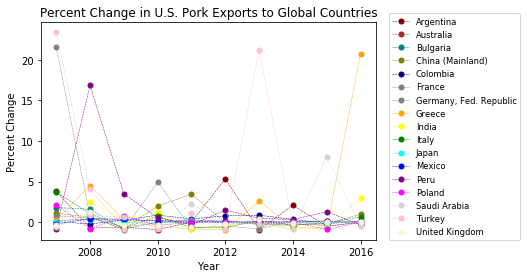

In [256]:
color = "brown"
marker = "o"
columns = []

for column in summary_pork_pct:
     if column != "Indonesia" and column != "Zambia":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Colombia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
       
        
        x_axis = summary_pork_pct.index
        y_axis = summary_pork_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Pork Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.savefig("task2_graph_images/pork_exports.png",bbox_inches="tight")
plt.show

In [257]:
summary_chicken_imports = chicken_imports.groupby(["Country","Year"]).sum().reset_index()
summary_chicken_imports

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Australia,2006,4177,486220,2.301000e+03,2.093910
1,Australia,2009,13223,677878,6.121422e+05,566.049897
2,Australia,2010,11738,507410,6.705900e+04,61.023690
3,Australia,2011,148981,5090235,2.049687e+06,1865.215170
4,Australia,2012,15445,450656,1.433700e+05,130.466700
...,...,...,...,...,...,...
65,Mexico,2015,975286,3573306,1.056746e+07,9616.389510
66,United Kingdom,2011,531080,1036998,5.232942e+04,48.389186
67,United Kingdom,2013,265922,234844,1.680806e+03,1.533133
68,United Kingdom,2015,266380,445512,6.176961e+03,5.634264


In [258]:
#data munge and convert to percent change
summary_chick_imports_pivot = summary_chicken_imports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_chick_imports_pct = summary_chick_imports_pivot.pct_change()
summary_chick_imports_pct

Country,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,United Kingdom
Year,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.000000,-0.329026,NaN,-0.318829,0.231373,NaN,0.0,NaN,0.225518,20.576937,NaN
2008,0.000000,0.393924,0.0,0.814349,0.034921,NaN,0.0,NaN,-0.655512,0.000000,NaN
2009,269.331532,-0.246653,0.0,-0.238902,-0.201845,NaN,0.0,7.117669,1.408998,0.000000,NaN
2010,-0.892194,0.107886,0.0,0.167354,-0.998169,NaN,0.0,-0.913043,0.248152,0.000000,NaN
2011,29.565427,0.074418,0.0,0.084656,286.859405,NaN,0.0,0.000000,0.306712,0.792622,NaN
2012,-0.930053,0.063481,0.0,0.135269,-0.998493,NaN,0.0,0.200000,-0.055086,-0.767409,0.000000
2013,0.000000,-0.262903,0.0,0.217583,520.577768,NaN,0.0,-0.682740,0.374613,5.866290,-0.968317
2014,0.000000,0.220018,0.0,-0.924663,21.057809,NaN,0.0,16.233528,0.097333,0.000000,0.000000


In [259]:
#Add mean column
ch_im_mean = summary_chick_imports_pct.drop(columns=["Colombia"])
ch_im_mean["Mean"] = ch_im_mean.mean(axis=1)
ch_im_mean

Country,Australia,China (Mainland),France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,United Kingdom,Mean
Year,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.000000,-0.329026,-0.318829,0.231373,NaN,0.0,NaN,0.225518,20.576937,NaN,2.912282
2008,0.000000,0.393924,0.814349,0.034921,NaN,0.0,NaN,-0.655512,0.000000,NaN,0.083955
2009,269.331532,-0.246653,-0.238902,-0.201845,NaN,0.0,7.117669,1.408998,0.000000,NaN,34.646350
2010,-0.892194,0.107886,0.167354,-0.998169,NaN,0.0,-0.913043,0.248152,0.000000,NaN,-0.285002
2011,29.565427,0.074418,0.084656,286.859405,NaN,0.0,0.000000,0.306712,0.792622,NaN,39.710405
2012,-0.930053,0.063481,0.135269,-0.998493,NaN,0.0,0.200000,-0.055086,-0.767409,0.000000,-0.261366
2013,0.000000,-0.262903,0.217583,520.577768,NaN,0.0,-0.682740,0.374613,5.866290,-0.968317,58.346921
2014,0.000000,0.220018,-0.924663,21.057809,NaN,0.0,16.233528,0.097333,0.000000,0.000000,4.076003


<function matplotlib.pyplot.show(*args, **kw)>

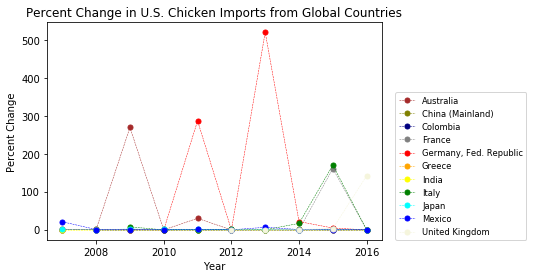

In [260]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_chick_imports_pct:
     #if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Colombia':
            color='navy'
        if column=='France':
            color='grey'
        if column=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = summary_chick_imports_pct.index
        y_axis = summary_chick_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Imports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.savefig("task2_graph_images/chicken_imports.png",bbox_inches="tight")
plt.show

In [261]:
summary_beef_imports = beef_imports.groupby(["Country","Year"]).sum().reset_index()
summary_beef_imports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06
1,Argentina,2007,30083,17998645,1.715963e+08,6.316710e+06
2,Argentina,2008,45504,18750702,1.390987e+08,5.112003e+06
3,Argentina,2009,71905,21202413,1.087845e+08,3.992219e+06
4,Argentina,2010,72326,14458465,1.070546e+08,3.923230e+06


In [262]:
#data munge and convert to percent change
summary_beef_imports_pivot = summary_beef_imports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_beef_imports_pct = summary_beef_imports_pivot.pct_change()
summary_beef_imports_pct

Country,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Italy,Japan,Mexico,Poland,United Kingdom
Year,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.000045,NaN,NaN,0.176673,NaN,NaN,2.093429,0.069330,-0.547286,NaN
2008,-0.190718,-0.253076,0.000000,NaN,0.197353,NaN,0.000000,-0.731744,-0.199001,-0.694711,NaN
2009,-0.219050,0.194247,0.000000,NaN,0.247417,NaN,33.269702,-0.036891,0.500223,-0.993808,NaN
2010,-0.017281,-0.284554,0.000000,NaN,-0.329658,NaN,0.000000,-0.710505,0.536084,0.000000,-0.566323
2011,-0.025124,-0.202033,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.413021,0.000000,0.000000
2012,-0.947309,0.447925,0.000000,0.0,0.000000,NaN,0.000000,-0.198579,0.481105,0.000000,0.000000
2013,0.949274,-0.046803,0.000000,0.0,0.000000,0.0,0.000000,6.721924,-0.003465,0.000000,0.000000
2014,-0.551902,0.735374,8.599203,0.0,0.000000,0.0,0.000000,1.553271,0.225623,0.000000,0.000000


In [263]:
beef_im_mean = summary_beef_imports_pct.drop(columns=["Poland", "Colombia"])
beef_im_mean["Mean"] = beef_im_mean.mean(axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

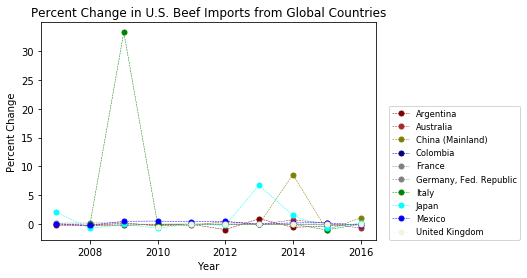

In [264]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_beef_imports_pct:
     if column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Colombia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = summary_beef_imports_pct.index
        y_axis = summary_beef_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Beef Imports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.savefig("task2_graph_images/beef_imports.png",bbox_inches="tight")
plt.show

In [265]:
summary_pork_imports = pork_imports.groupby(["Country","Year"]).sum().reset_index()
summary_pork_imports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Australia,2006,59386,5080930,257294.300340,3537.910389
1,Australia,2007,86418,5394606,291858.830232,5183.833604
2,Australia,2008,102631,4862036,71977.805661,103.383341
3,Australia,2009,117498,4187698,98241.142579,141.105962
4,Australia,2010,129464,4150699,120032.290679,172.405078


In [266]:
#data munge and convert to percent change
summary_pork_imports_pivot = summary_pork_imports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_pork_imports_pct = summary_pork_imports_pivot.pct_change()
summary_pork_imports_pct

Country,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.465225,0.000000,NaN,-0.797501,-0.479881,0.151775,NaN,0.280160,NaN,0.148235,0.082090
2008,-0.980057,0.746229,0.000000,15.154596,-0.022478,-0.033771,NaN,-0.207876,NaN,0.004294,-0.013669
2009,0.364881,0.000000,0.000000,-0.520735,0.196809,-0.083092,0.000000,-0.539451,NaN,-0.036581,0.097628
2010,0.221813,0.000000,-0.997807,1.462439,0.166325,0.197187,-0.783124,0.033215,NaN,0.139387,0.111728
2011,-0.269187,0.000000,0.000000,-0.095958,0.298459,0.074155,0.000000,-0.017936,NaN,-0.084195,0.113754
2012,13.737760,0.000000,689.207898,1.794488,-0.124751,0.269272,0.000000,0.068705,NaN,0.078133,0.188655
2013,-0.752281,0.000000,0.000000,-0.372963,0.173599,0.036944,0.000000,-0.049854,NaN,0.174849,0.274946
2014,-0.627723,-0.190675,0.000000,0.412512,0.400078,0.139735,0.000000,0.330931,NaN,0.875234,0.106671


In [267]:
pork_im_mean = summary_pork_imports_pct.drop(columns=["Colombia", "Poland"])
pork_im_mean["Mean"] = pork_im_mean.mean(axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

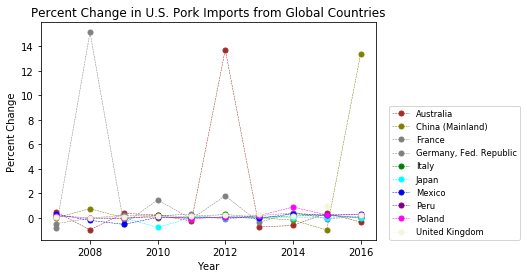

In [268]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_pork_imports_pct:
     if column != "Colombia":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Colombia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = summary_pork_imports_pct.index
        y_axis = summary_pork_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Pork Imports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.savefig("task2_graph_images/pork_imports.png",bbox_inches="tight")
plt.show

In [269]:
mean_gdp_csv = "mean_gdp.csv"
mean_gdp = pd.read_csv(mean_gdp_csv)
mean_gdp

,Unnamed: 0,LOCATION,Mean GDP
0,0,Zambia,5.270571e+06
1,1,Bulgaria,1.261515e+07
2,2,Peru,2.422984e+07
3,3,Greece,3.369476e+07
4,4,Colombia,5.901578e+07
5,5,Argentina,8.545881e+07
6,6,Poland,9.236562e+07
7,7,Australia,1.085364e+08
8,8,Saudi Arabia,1.510547e+08
9,9,Turkey,1.610527e+08


In [270]:
ch_ex_mean_high = summary_chicken_pct.drop(columns=["Zambia","Bulgaria","Peru","Greece","Colombia","Argentina","Indonesia","Poland","Australia","Saudi Arabia","Turkey","Mexico","Italy","United Kingdom"])
ch_ex_mean_high["Mean"] = ch_ex_mean_high.mean(axis=1)

In [271]:
beef_ex_mean_high = summary_beef_pct.drop(columns=["Zambia","Bulgaria","Peru","Greece","Colombia","Argentina","Indonesia","Poland","Australia","Saudi Arabia","Turkey","Mexico","Italy","United Kingdom"])
beef_ex_mean_high["Mean"] = beef_ex_mean_high.mean(axis=1)

In [272]:
pork_ex_mean_high = summary_pork_pct.drop(columns=["Zambia","Bulgaria","Peru","Greece","Colombia","Argentina","Indonesia","Poland","Australia","Saudi Arabia","Turkey","Mexico","Italy","United Kingdom"])
pork_ex_mean_high["Mean"] = pork_ex_mean_high.mean(axis=1)

In [273]:
ch_ex_mean_low = summary_chicken_pct.drop(columns=["Bulgaria","Argentina","Australia","Saudi Arabia","Turkey","Mexico","Italy","Indonesia","United Kingdom","France","Germany, Fed. Republic","Japan","India","China (Mainland)"])
ch_ex_mean_low["Mean"] = ch_ex_mean_low.mean(axis=1)

In [274]:
beef_ex_mean_low = summary_beef_pct.drop(columns=["Bulgaria","Argentina","Australia","Saudi Arabia","Turkey","Mexico","Italy","Indonesia","United Kingdom","France","Germany, Fed. Republic","Japan","India","China (Mainland)"])
beef_ex_mean_low["Mean"] = beef_ex_mean_low.mean(axis=1)

In [275]:
pork_ex_mean_low = summary_pork_pct.drop(columns=["Bulgaria","Argentina","Australia","Saudi Arabia","Turkey","Mexico","Italy","Indonesia","United Kingdom","France","Germany, Fed. Republic","Japan","India","China (Mainland)"])
pork_ex_mean_low["Mean"] = pork_ex_mean_low.mean(axis=1)

In [306]:
beef_ex_mean_medium = summary_beef_pct.drop(columns=["China (Mainland)","India","Japan","Germany, Fed. Republic","France","Poland","Argentina","Colombia","Greece","Peru","Bulgaria","Zambia"])
beef_ex_mean_medium["Mean"] = beef_ex_mean_medium.mean(axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

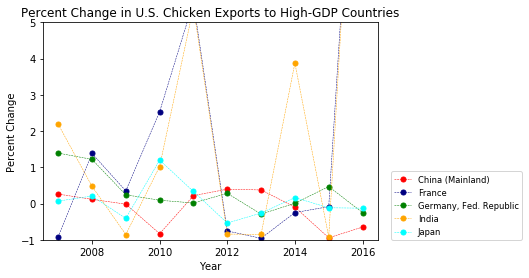

In [276]:
#graph pct change vs. time
marker = "o"
columns = []

for column in summary_chicken_pct:
     if column == "China (Mainland)" or column == "India" or column == "Japan" or column == "Germany, Fed. Republic" or column == "France":   
        
        
        if column == 'China (Mainland)':
            color='red'
        if column=='France':
            color='navy'
        if column=='Germany, Fed. Republic':
            color='green'
        if column == 'India':
            color='orange'
        if column=='Japan':
            color='cyan'
        
        
        x_axis = summary_chicken_pct.index
        y_axis = summary_chicken_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Exports to High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/chicken_exports_high_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

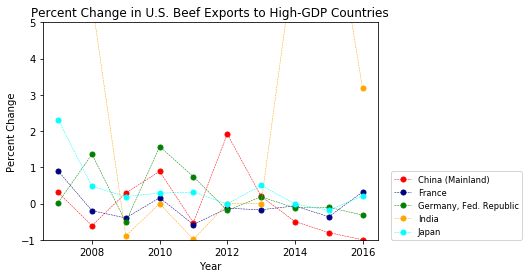

In [277]:
#graph pct change vs. time
marker = "o"
columns = []

for column in summary_beef_pct:
     if column == "China (Mainland)" or column == "India" or column == "Japan" or column == "Germany, Fed. Republic" or column == "France":   
        
        
        if column == 'China (Mainland)':
            color='red'
        if column=='France':
            color='navy'
        if column=='Germany, Fed. Republic':
            color='green'
        if column == 'India':
            color='orange'
        if column=='Japan':
            color='cyan'
        
        
        x_axis = summary_beef_pct.index
        y_axis = summary_beef_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Beef Exports to High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/beef_exports_high_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

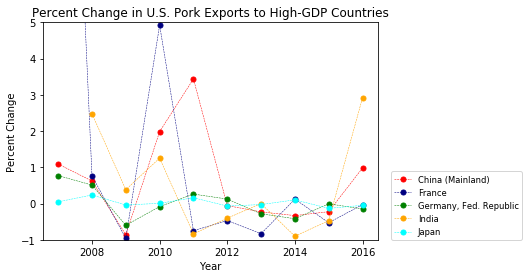

In [278]:
#graph pct change vs. time
marker = "o"
columns = []

for column in summary_pork_pct:
     if column == "China (Mainland)" or column == "India" or column == "Japan" or column == "Germany, Fed. Republic" or column == "France":   
        
        
        if column == 'China (Mainland)':
            color='red'
        if column=='France':
            color='navy'
        if column=='Germany, Fed. Republic':
            color='green'
        if column == 'India':
            color='orange'
        if column=='Japan':
            color='cyan'
        
        
        x_axis = summary_pork_pct.index
        y_axis = summary_pork_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Pork Exports to High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/pork_exports_high_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

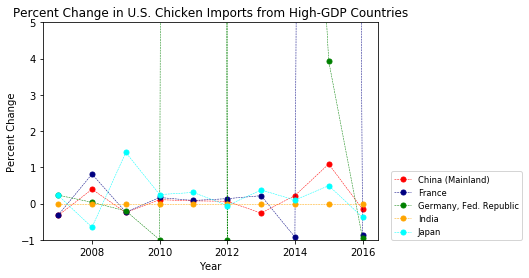

In [279]:
#graph pct change vs. time
marker = "o"
columns = []

for column in summary_chick_imports_pct:
     if column == "China (Mainland)" or column == "India" or column == "Japan" or column == "Germany, Fed. Republic" or column == "France":   
        
        
        if column == 'China (Mainland)':
            color='red'
        if column=='France':
            color='navy'
        if column=='Germany, Fed. Republic':
            color='green'
        if column == 'India':
            color='orange'
        if column=='Japan':
            color='cyan'
        
        
        x_axis = summary_chick_imports_pct.index
        y_axis = summary_chick_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Imports from High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/chicken_imports_high_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

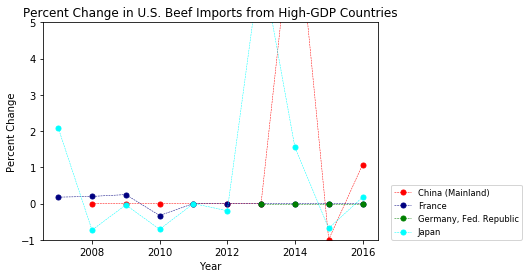

In [280]:
#graph pct change vs. time
marker = "o"
columns = []

for column in summary_beef_imports_pct:
     if column == "China (Mainland)" or column == "India" or column == "Japan" or column == "Germany, Fed. Republic" or column == "France":   
        
        
        if column == 'China (Mainland)':
            color='red'
        if column=='France':
            color='navy'
        if column=='Germany, Fed. Republic':
            color='green'
        if column == 'India':
            color='orange'
        if column=='Japan':
            color='cyan'
        
        
        x_axis = summary_beef_imports_pct.index
        y_axis = summary_beef_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Beef Imports from High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/beef_imports_high_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

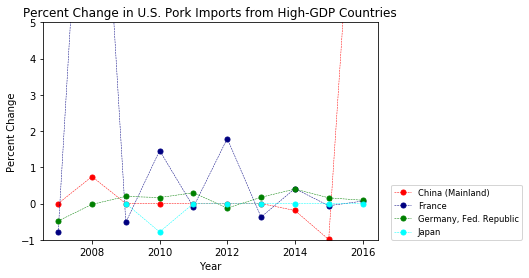

In [281]:
#graph pct change vs. time
marker = "o"
columns = []

for column in summary_pork_imports_pct:
     if column == "China (Mainland)" or column == "India" or column == "Japan" or column == "Germany, Fed. Republic" or column == "France":   
        
        
        if column == 'China (Mainland)':
            color='red'
        if column=='France':
            color='navy'
        if column=='Germany, Fed. Republic':
            color='green'
        if column == 'India':
            color='orange'
        if column=='Japan':
            color='cyan'
        
        
        x_axis = summary_pork_imports_pct.index
        y_axis = summary_pork_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Pork Imports from High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/pork_imports_high_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

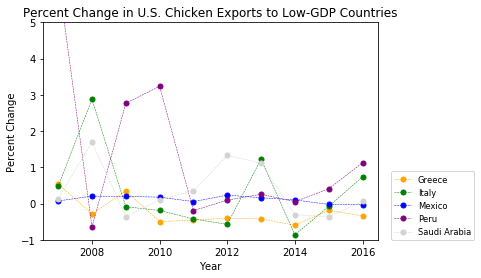

In [282]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_chicken_pct:
     if column == "Greece" or column == "Italy" or column == "Mexico" or column == "Peru" or column == "Saudi Arabia":   
        
        
        if column == 'Australia':
            color='brown'
        
        if column == 'Greece':
            color='orange'
        
        if column =='Italy':
            color='green'
        
        if column=='Mexico':
            color='blue'
            
        if column=='Peru':
            color='purple'
        
        if column == 'Saudi Arabia':
            color='lightgrey'
        
        
        
        
        x_axis = summary_chicken_pct.index
        y_axis = summary_chicken_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Exports to Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/chicken_exports_low_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

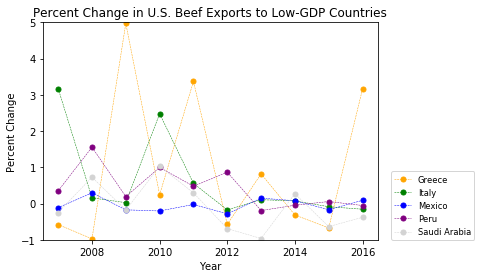

In [283]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_beef_pct:
     if column == "Greece" or column == "Italy" or column == "Mexico" or column == "Peru" or column == "Saudi Arabia":   
        
        
        if column == 'Greece':
            color='orange'
        
        if column =='Italy':
            color='green'
        
        if column=='Mexico':
            color='blue'
            
        if column=='Peru':
            color='purple'
        
        if column == 'Saudi Arabia':
            color='lightgrey'
        
        
        
        
        x_axis = summary_beef_pct.index
        y_axis = summary_beef_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Beef Exports to Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/beef_exports_low_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

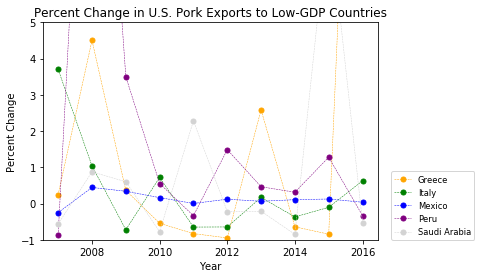

In [284]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_pork_pct:
     if column == "Greece" or column == "Italy" or column == "Mexico" or column == "Peru" or column == "Saudi Arabia":   
        
        
        if column == 'Greece':
            color='orange'
        
        if column =='Italy':
            color='green'
        
        if column=='Mexico':
            color='blue'
            
        if column=='Peru':
            color='purple'
        
        if column == 'Saudi Arabia':
            color='lightgrey'
        
        
        
        
        x_axis = summary_pork_pct.index
        y_axis = summary_pork_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Pork Exports to Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/pork_exports_low_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

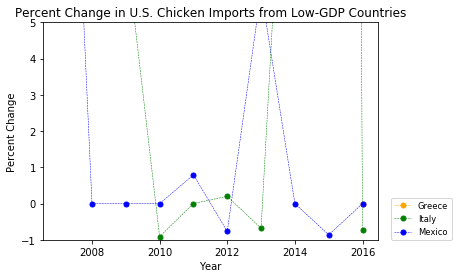

In [285]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_chick_imports_pct:
     if column == "Greece" or column == "Italy" or column == "Mexico" or column == "Peru" or column == "Saudi Arabia":   
        
        
        if column == 'Greece':
            color='orange'
        
        if column =='Italy':
            color='green'
        
        if column=='Mexico':
            color='blue'
            
        if column=='Peru':
            color='purple'
        
        if column == 'Saudi Arabia':
            color='lightgrey'
        
        
        
        
        x_axis = summary_chick_imports_pct.index
        y_axis = summary_chick_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Chicken Imports from Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/chicken_imports_low_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

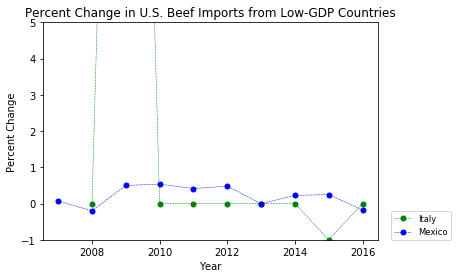

In [286]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_beef_imports_pct:
     if column == "Greece" or column == "Italy" or column == "Mexico" or column == "Peru" or column == "Saudi Arabia":   
        
        
        if column == 'Greece':
            color='orange'
        
        if column =='Italy':
            color='green'
        
        if column=='Mexico':
            color='blue'
            
        if column=='Peru':
            color='purple'
        
        if column == 'Saudi Arabia':
            color='lightgrey'
        
        
        
        
        x_axis = summary_beef_imports_pct.index
        y_axis = summary_beef_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Beef Imports from Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])


plt.savefig("task2_graph_images/beef_imports_low_gdp.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

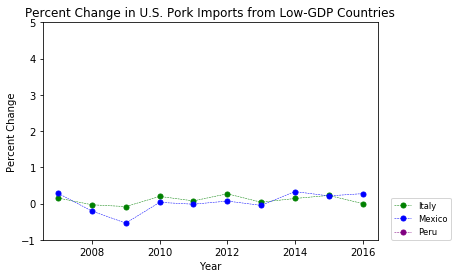

In [287]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in summary_pork_imports_pct:
     if column == "Greece" or column == "Italy" or column == "Mexico" or column == "Peru" or column == "Saudi Arabia":   
        
        
        if column == 'Greece':
            color='orange'
        
        if column =='Italy':
            color='green'
        
        if column=='Mexico':
            color='blue'
            
        if column=='Peru':
            color='purple'
        
        if column == 'Saudi Arabia':
            color='lightgrey'
        
        
        
        
        x_axis = summary_pork_imports_pct.index
        y_axis = summary_pork_imports_pct[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)

plt.title("Percent Change in U.S. Pork Imports from Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,5])

plt.savefig("task2_graph_images/pork_imports_low_gdp.png",bbox_inches="tight")
plt.show

In [134]:
ch_ex_mean.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')

<function matplotlib.pyplot.show(*args, **kw)>

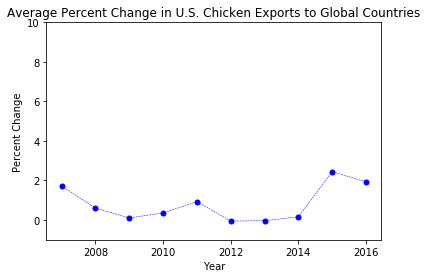

In [292]:
plt.errorbar(ch_ex_mean.index, ch_ex_mean["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Chicken Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_chicken_exports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

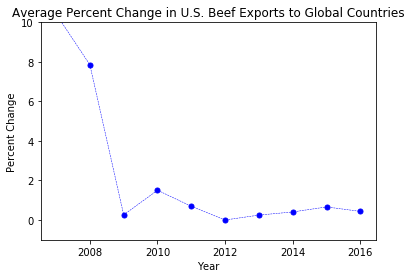

In [291]:
plt.errorbar(beef_ex_mean.index, beef_ex_mean["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Beef Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_beef_exports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

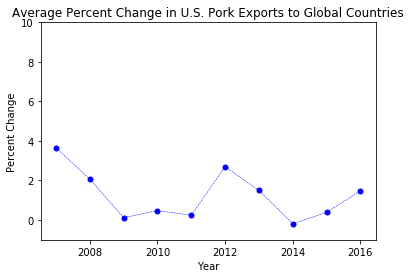

In [293]:
plt.errorbar(pork_ex_mean.index, pork_ex_mean["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Pork Exports to Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_pork_exports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

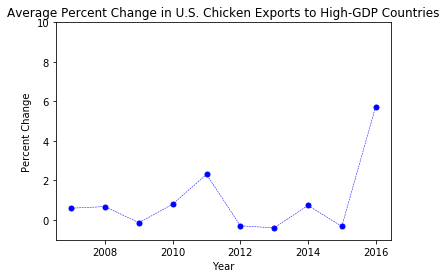

In [294]:
plt.errorbar(ch_ex_mean_high.index, ch_ex_mean_high["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Chicken Exports to High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_chicken_exports_high.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

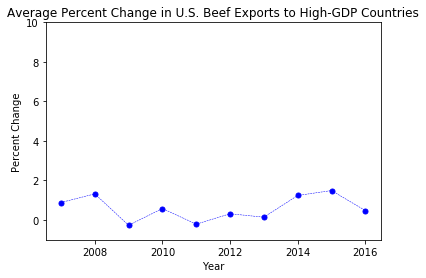

In [295]:
plt.errorbar(beef_ex_mean_high.index, beef_ex_mean_high["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Beef Exports to High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_beef_exports_high.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

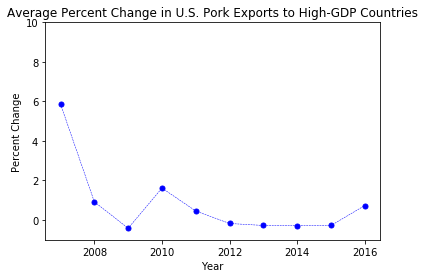

In [296]:
plt.errorbar(pork_ex_mean_high.index, pork_ex_mean_high["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Pork Exports to High-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_pork_exports_high.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

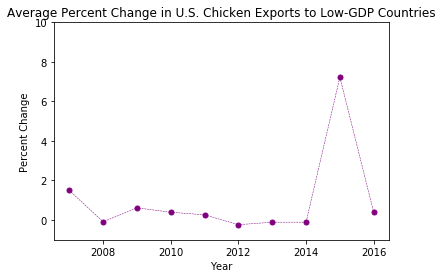

In [297]:
plt.errorbar(ch_ex_mean_low.index, ch_ex_mean_low["Mean"], color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Chicken Exports to Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_chicken_exports_low.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

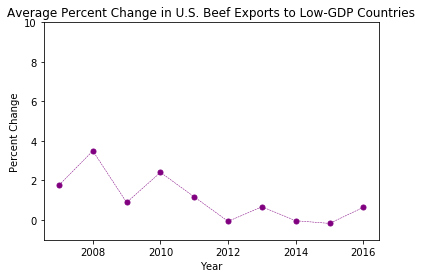

In [298]:
plt.errorbar(beef_ex_mean_low.index, beef_ex_mean_low["Mean"], color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Beef Exports to Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])

plt.savefig("task2_graph_images/mean_graphs/average_beef_exports_low.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

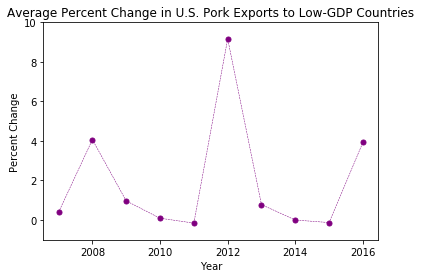

In [299]:
plt.errorbar(pork_ex_mean_low.index, pork_ex_mean_low["Mean"], color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Pork Exports to Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,10])


plt.savefig("task2_graph_images/mean_graphs/average_pork_exports_low.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

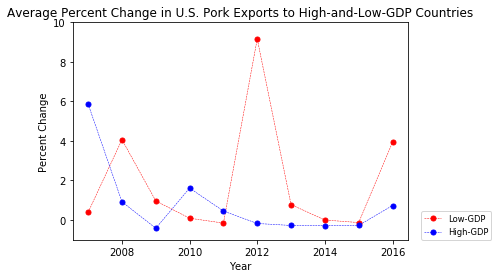

In [300]:
plt.errorbar(pork_ex_mean_low.index, pork_ex_mean_low["Mean"], color="r", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pork_ex_mean_high.index, pork_ex_mean_high["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

titles = ["Low-GDP","High-GDP"]
plt.title("Average Percent Change in U.S. Pork Exports to High-and-Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.legend(titles,loc=(1.04,0),fontsize="small",fancybox=True)

plt.ylim([-1,10])

plt.savefig("task2_graph_images/mean_graphs/average_pork_exports_both.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

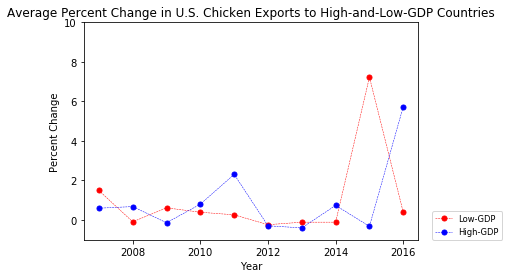

In [301]:
plt.errorbar(ch_ex_mean_low.index, ch_ex_mean_low["Mean"], color="r", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(ch_ex_mean_high.index, ch_ex_mean_high["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

titles = ["Low-GDP","High-GDP"]
plt.title("Average Percent Change in U.S. Chicken Exports to High-and-Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.legend(titles,loc=(1.04,0),fontsize="small",fancybox=True)

plt.ylim([-1,10])

plt.savefig("task2_graph_images/mean_graphs/average_chicken_exports_both.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

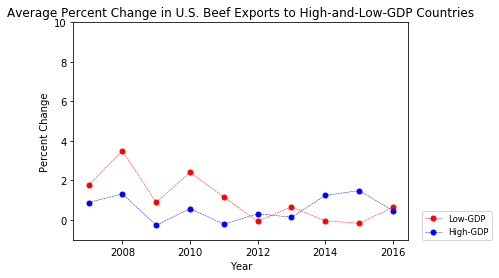

In [302]:
plt.errorbar(beef_ex_mean_low.index, beef_ex_mean_low["Mean"], color="r", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(beef_ex_mean_high.index, beef_ex_mean_high["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

titles = ["Low-GDP","High-GDP"]
plt.title("Average Percent Change in U.S. Beef Exports to High-and-Low-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.legend(titles,loc=(1.04,0),fontsize="small",fancybox=True)

plt.ylim([-1,10])

plt.savefig("task2_graph_images/mean_graphs/average_beef_exports_both.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

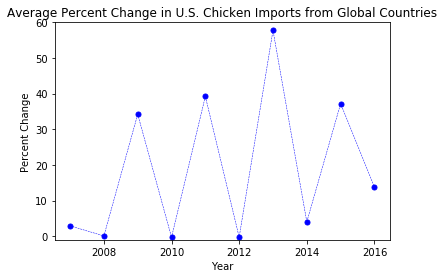

In [191]:
plt.errorbar(ch_im_mean.index, ch_im_mean["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Chicken Imports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,60])


plt.savefig("task2_graph_images/mean_graphs/average_chicken_imports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

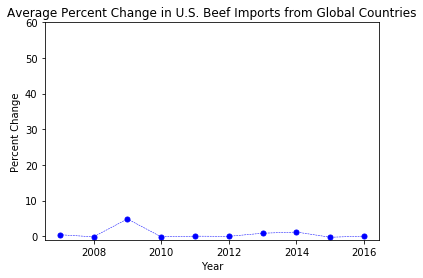

In [190]:
plt.errorbar(beef_im_mean.index, beef_im_mean["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Beef Imports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,60])


plt.savefig("task2_graph_images/mean_graphs/average_beef_imports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

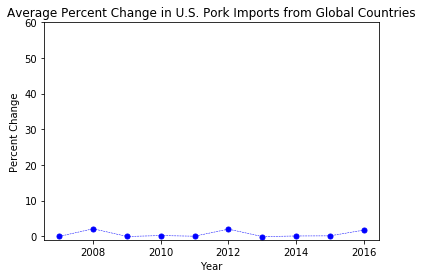

In [193]:
plt.errorbar(pork_im_mean.index, pork_im_mean["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Pork Imports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

plt.ylim([-1,60])


plt.savefig("task2_graph_images/mean_graphs/average_pork_imports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

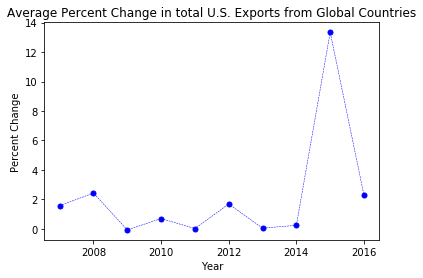

In [212]:
plt.errorbar(exports_pct.index, exports_pct["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in total U.S. Exports from Global Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

#plt.ylim([-1,60])


#plt.savefig("task2_graph_images/mean_graphs/average_pork_imports.png",bbox_inches="tight")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

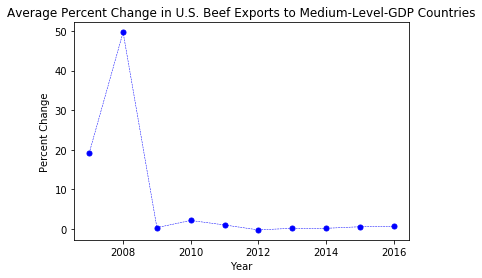

In [308]:
plt.errorbar(beef_ex_mean_medium.index, beef_ex_mean_medium["Mean"], color="b", marker=marker, markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Average Percent Change in U.S. Beef Exports to Medium-Level-GDP Countries")
plt.xlabel("Year")
plt.ylabel("Percent Change")

#plt.ylim([-1,10])

plt.savefig("task2_graph_images/mean_graphs/average_beef_exports_medium.png",bbox_inches="tight")
plt.show
